<a href="https://colab.research.google.com/github/Aditya100300/Classification-of-COVID-19-chest-X-ray-images/blob/master/covid19_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


Using TensorFlow backend.


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!git clone https://github.com/vaibhavG321/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 664 (delta 1), reused 2 (delta 0), pack-reused 656
Receiving objects: 100% (664/664), 222.69 MiB | 23.24 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Checking out files: 100% (698/698), done.


In [4]:
!ls

Classification-of-COVID-19-chest-X-ray-images  drive  sample_data


In [5]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images


In [6]:
!ls

aditi-godbole-model.py	aditya-gurnani-model.py  dataset      vaibhav-model.py
aditi-verma-model.py	augmentation.ipynb	 README.md
aditya-babar-model.py	covid_VGG16.ipynb	 test1.ipynb


In [7]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset


In [8]:
!ls

evaluation  testing  training


In [9]:
cd training

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training


In [10]:
!ls

infected  normal


In [11]:
train_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal'
train_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected'
test_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal'
test_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected'
evaluate_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal'
evaluate_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected'

In [12]:
print('train_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal')))
print('train_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected')))
print('test_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal')))
print('test_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected')))
print('evaluate_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal')))
print('evaluate_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected')))

train_normal cases  297
train_infected cases  296
test_normal cases  69
test_infected cases  25
evaluate_normal cases  1
evaluate_infected cases  1


In [13]:
IMAGE_SIZE = (224,224)
DIR_NAME = '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/'
IMAGE_DIR = DIR_NAME + 'normal/'
imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
      imagePaths.append(os.path.join(dirname, filename))

In [14]:
imagePaths

['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0374-0001-0002.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0288-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0360-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0222-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0267-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0336-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0221-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0232-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal/NORMAL2-IM-0349-0001.jpeg',
 '/content/Classificati

In [15]:
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [16]:
data.shape

(689, 224, 224, 3)

In [17]:
labels


array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', 'infected',
       'infected', 'infected', 'infected', 'infected', '

In [18]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,	rotation_range=15,
	fill_mode="nearest")

In [19]:
trainY.argmax(axis=1)

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [20]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((551, 224, 224, 3), (138, 224, 224, 3), (551, 2), (138, 2))

USING VGG16 MODEL

In [66]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [67]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)


In [68]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 34
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/34
34/34 [==============================] - 15s 429ms/step - loss: 0.6659 - accuracy: 0.6112 - val_loss: 0.5268 - val_accuracy: 0.8043
Epoch 2/34
34/34 [==============================] - 10s 289ms/step - loss: 0.4794 - accuracy: 0.8187 - val_loss: 0.4024 - val_accuracy: 0.9058
Epoch 3/34
34/34 [==============================] - 10s 285ms/step - loss: 0.4079 - accuracy: 0.8505 - val_loss: 0.3170 - val_accuracy: 0.9130
Epoch 4/34
34/34 [==============================] - 10s 288ms/step - loss: 0.3091 - accuracy: 0.9084 - val_loss: 0.2581 - val_accuracy: 0.9203
Epoch 5/34
34/34 [==============================] - 10s 285ms/step - loss: 0.2879 - accuracy: 0.8935 - val_loss: 0.2264 - val_accuracy: 0.9275
Epoch 6/34
34/34 [==============================] - 10s 290ms/step - loss: 0.2246 - accuracy: 0.9346 - val_loss: 0.2065 - val_accuracy: 0.9275
Epoch 7/34
34/34 [==============================] - 10s 283ms/step - loss: 0.2202 - accuracy

In [69]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.94      0.94        64
      normal       0.95      0.96      0.95        74

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



In [70]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[60  4]
 [ 3 71]]
acc: 0.9493
sensitivity: 0.9375
specificity: 0.9595


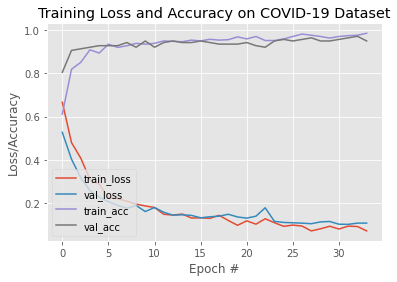

In [71]:
# plot the training loss and accuracy
N = 34
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [ ]:
predIdxs

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [74]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]


In [ ]:
img.shape

(1, 224, 224, 3)

END OF VGG16


WITHOUT PRETRAINED MODEL

In [75]:
model = Sequential()
model.add(Conv2D(80, (3, 3),activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3),activation='relu'))


model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

In [76]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [77]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 34
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/34
34/34 [==============================] - 8s 239ms/step - loss: 0.6116 - accuracy: 0.6897 - val_loss: 0.5409 - val_accuracy: 0.9565
Epoch 2/34
34/34 [==============================] - 7s 217ms/step - loss: 0.3669 - accuracy: 0.8654 - val_loss: 0.6107 - val_accuracy: 0.9275
Epoch 3/34
34/34 [==============================] - 7s 214ms/step - loss: 0.2309 - accuracy: 0.9215 - val_loss: 0.1667 - val_accuracy: 0.9638
Epoch 4/34
34/34 [==============================] - 7s 211ms/step - loss: 0.2256 - accuracy: 0.9065 - val_loss: 0.4936 - val_accuracy: 0.9565
Epoch 5/34
34/34 [==============================] - 7s 218ms/step - loss: 0.1805 - accuracy: 0.9327 - val_loss: 0.0926 - val_accuracy: 0.9710
Epoch 6/34
34/34 [==============================] - 7s 215ms/step - loss: 0.2362 - accuracy: 0.9402 - val_loss: 0.1527 - val_accuracy: 0.9783
Epoch 7/34
34/34 [==============================] - 7s 215ms/step - loss: 0.1697 - accuracy: 0.930

In [78]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.95      0.98      0.97        64
      normal       0.99      0.96      0.97        74

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138



In [79]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[63  1]
 [ 3 71]]
acc: 0.9710
sensitivity: 0.9844
specificity: 0.9595


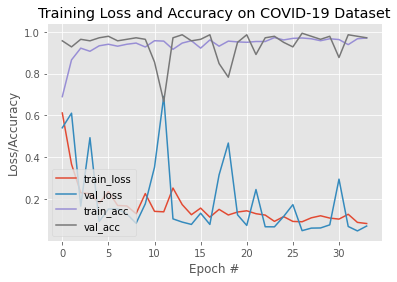

In [80]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [81]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg',
                    '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[0]


END OF WITHOUT PRETRAINED MODEL

USING INCEPTION-V3 MODEL

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#construct the head of the model that will be placed on top of the
#the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 34
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/34
34/34 [==============================] - 7s 210ms/step - loss: 0.2133 - accuracy: 0.9522 - val_loss: 0.1017 - val_accuracy: 0.9710
Epoch 2/34
34/34 [==============================] - 6s 163ms/step - loss: 0.2275 - accuracy: 0.9234 - val_loss: 0.1622 - val_accuracy: 0.9565
Epoch 3/34
34/34 [==============================] - 6s 164ms/step - loss: 0.1691 - accuracy: 0.9421 - val_loss: 0.0871 - val_accuracy: 0.9638
Epoch 4/34
34/34 [==============================] - 6s 165ms/step - loss: 0.1515 - accuracy: 0.9495 - val_loss: 0.1002 - val_accuracy: 0.9638
Epoch 5/34
34/34 [==============================] - 6s 182ms/step - loss: 0.1237 - accuracy: 0.9607 - val_loss: 0.0622 - val_accuracy: 0.9783
Epoch 6/34
34/34 [==============================] - 6s 164ms/step - loss: 0.1215 - accuracy: 0.9421 - val_loss: 0.0911 - val_accuracy: 0.9638
Epoch 7/34
34/34 [==============================] - 5s 161ms/step - loss: 0.1219 - accuracy: 0.951

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.98      0.94      0.96        64
      normal       0.95      0.99      0.97        74

    accuracy                           0.96       138
   macro avg       0.97      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



In [ ]:
#model.predict(trainX[0]).argmax(axis=1)
image = cv2.imread('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
img=np.reshape(image,(1,224,224,3))
a=trainX[3].reshape((1,224,224,3))
model.predict(a).argmax(axis=1)

In [ ]:
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
#model.predict(trainX[0]).argmax(axis=1)
a=trainX[3].reshape((1,224,224,3))
model.predict(a).argmax(axis=1)

array([0])

In [ ]:
model.predict(trainX).argmax(axis=1)

In [144]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg',
                    '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))


[1]
[0]


In [ ]:
predIdxs

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1])

In [ ]:
testY.argmax(axis=1)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1])

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[60  4]
 [ 1 73]]
acc: 0.9638
sensitivity: 0.9375
specificity: 0.9865


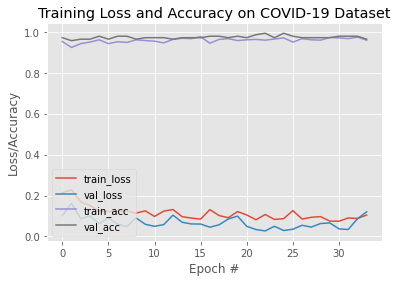

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [145]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[0]


END OF INCEPTION V3 MODEL

RESNET50

In [22]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [23]:
res = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=res.input, outputs=outputs)
for layer in res.layers:
  layer.trainable = False


94773248/94765736 [==============================] - 1s 0us/step


In [24]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [25]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 34
BS = 32
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/34
17/17 [==============================] - 11s 649ms/step - loss: 1.4620 - accuracy: 0.5414 - val_loss: 1.4159 - val_accuracy: 0.4638
Epoch 2/34
17/17 [==============================] - 8s 476ms/step - loss: 1.1640 - accuracy: 0.6069 - val_loss: 0.4042 - val_accuracy: 0.7899
Epoch 3/34
17/17 [==============================] - 8s 480ms/step - loss: 0.5237 - accuracy: 0.7803 - val_loss: 0.1818 - val_accuracy: 0.9493
Epoch 4/34
17/17 [==============================] - 8s 480ms/step - loss: 0.4920 - accuracy: 0.8015 - val_loss: 0.4129 - val_accuracy: 0.8333
Epoch 5/34
17/17 [==============================] - 8s 481ms/step - loss: 0.4839 - accuracy: 0.8035 - val_loss: 0.1731 - val_accuracy: 0.9420
Epoch 6/34
17/17 [==============================] - 8s 484ms/step - loss: 0.3723 - accuracy: 0.8516 - val_loss: 0.1709 - val_accuracy: 0.9493
Epoch 7/34
17/17 [===

In [26]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.97      0.91      0.94        64
      normal       0.92      0.97      0.95        74

    accuracy                           0.94       138
   macro avg       0.94      0.94      0.94       138
weighted avg       0.94      0.94      0.94       138



In [27]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[58  6]
 [ 2 72]]
acc: 0.9420
sensitivity: 0.9062
specificity: 0.9730


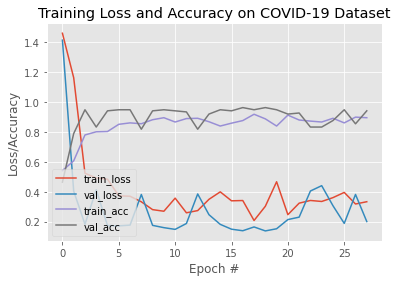

In [29]:
# plot the training loss and accuracy
N = 28
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [30]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[0]


END OF RESNET50


MOBILENET BY GOOGLE


In [31]:
import tensorflow as tf

In [32]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model MobileNet V2
baseModel = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False


9412608/9406464 [==============================] - 0s 0us/step


In [33]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [35]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 34
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/34
34/34 [==============================] - 8s 226ms/step - loss: 0.1049 - accuracy: 0.9645 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/34
34/34 [==============================] - 7s 198ms/step - loss: 0.1085 - accuracy: 0.9559 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 3/34
34/34 [==============================] - 7s 194ms/step - loss: 0.1903 - accuracy: 0.9551 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 4/34
34/34 [==============================] - 7s 193ms/step - loss: 0.1361 - accuracy: 0.9495 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 5/34
34/34 [==============================] - 7s 194ms/step - loss: 0.1691 - accuracy: 0.9458 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6/34
34/34 [==============================] - 7s 194ms/step - loss: 0.1425 - accuracy: 0.9477 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 7/34
34/34 [==============================] - 7s 212ms/step - loss: 0.0901 - accuracy: 0.968

In [36]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      1.00      1.00        64
      normal       1.00      1.00      1.00        74

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [37]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[64  0]
 [ 0 74]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


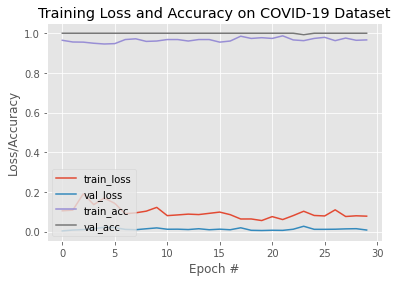

In [39]:
# plot the training loss and accuracy
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [42]:
predict_imagePaths=['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]


END OF MOBILENET


NASNetlarge

In [43]:
from tensorflow.keras.applications.nasnet import NASNetLarge


In [44]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model MobileNet V2
baseModel = tf.keras.applications.NASNetLarge(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False


343613440/343610240 [==============================] - 8s 0us/step


In [45]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 34
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/34
34/34 [==============================] - 32s 950ms/step - loss: 0.4060 - accuracy: 0.8505 - val_loss: 0.1173 - val_accuracy: 0.9710
Epoch 2/34
34/34 [==============================] - 23s 683ms/step - loss: 0.1763 - accuracy: 0.9364 - val_loss: 0.0941 - val_accuracy: 0.9638
Epoch 3/34
34/34 [==============================] - 23s 681ms/step - loss: 0.1333 - accuracy: 0.9514 - val_loss: 0.1702 - val_accuracy: 0.9565
Epoch 4/34
34/34 [==============================] - 20s 602ms/step - loss: 0.1145 - accuracy: 0.9495 - val_loss: 0.1383 - val_accuracy: 0.9710
Epoch 5/34
34/34 [==============================] - 20s 602ms/step - loss: 0.1404 - accuracy: 0.9477 - val_loss: 0.0805 - val_accuracy: 0.9783
Epoch 6/34
34/34 [==============================] - 24s 692ms/step - loss: 0.0955 - accuracy: 0.9607 - val_loss: 0.0935 - val_accuracy: 0.9710
Epoch 7/34
34/34 [==============================] - 23s 681ms/step - loss: 0.0636 - accuracy

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      0.92      0.96        64
      normal       0.94      1.00      0.97        74

    accuracy                           0.96       138
   macro avg       0.97      0.96      0.96       138
weighted avg       0.97      0.96      0.96       138

[[59  5]
 [ 0 74]]
acc: 0.9638
sensitivity: 0.9219
specificity: 1.0000


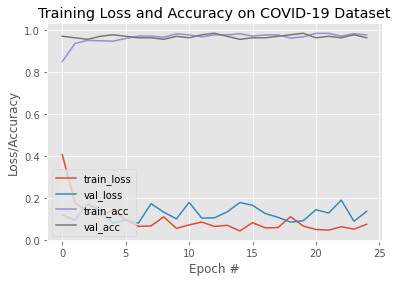

In [47]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))



  # compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 25), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,25), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,25), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [48]:
predict_imagePaths=[ '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(model.predict(img).argmax(axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]


END OF NASNetLarge


Xception MODEL

In [49]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [50]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model Xception
baseModel = tf.keras.applications.Xception(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


Xception_model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


In [51]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 35
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
Xception_model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = Xception_model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/35
34/34 [==============================] - 13s 377ms/step - loss: 0.2758 - accuracy: 0.8822 - val_loss: 0.0335 - val_accuracy: 0.9928
Epoch 2/35
34/34 [==============================] - 10s 287ms/step - loss: 0.1471 - accuracy: 0.9477 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 3/35
34/34 [==============================] - 10s 289ms/step - loss: 0.1159 - accuracy: 0.9607 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 4/35
34/34 [==============================] - 9s 274ms/step - loss: 0.1044 - accuracy: 0.9589 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 5/35
34/34 [==============================] - 10s 285ms/step - loss: 0.0751 - accuracy: 0.9757 - val_loss: 0.0242 - val_accuracy: 0.9928
Epoch 6/35
34/34 [==============================] - 9s 273ms/step - loss: 0.0695 - accuracy: 0.9738 - val_loss: 0.0202 - val_accuracy: 0.9928
Epoch 7/35
34/34 [==============================] - 9s 275ms/step - loss: 0.0772 - accuracy: 0

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      1.00      1.00        64
      normal       1.00      1.00      1.00        74

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

[[64  0]
 [ 0 74]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


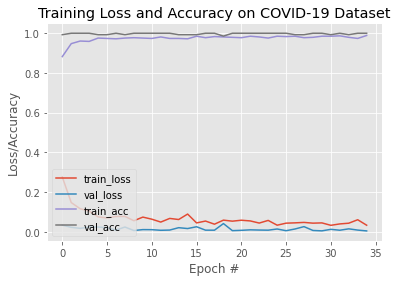

In [54]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = Xception_model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))



  # compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


# plot the training loss and accuracy
N = 35
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 35), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 35), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 35), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 35), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [55]:
predict_imagePaths=[ '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(Xception_model.predict(img).argmax(axis=1))


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]


END OF XCEPTION

DENSENET121

In [56]:
from tensorflow.keras.applications import DenseNet121


In [57]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model MobileNet V2
baseModel = tf.keras.applications.DenseNet121(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


DenseNet121_model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

29089792/29084464 [==============================] - 1s 0us/step


In [58]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 35
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
DenseNet121_model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = DenseNet121_model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/35
34/34 [==============================] - 14s 407ms/step - loss: 0.5909 - accuracy: 0.7477 - val_loss: 0.1124 - val_accuracy: 0.9565
Epoch 2/35
34/34 [==============================] - 9s 257ms/step - loss: 0.3604 - accuracy: 0.8561 - val_loss: 0.1057 - val_accuracy: 0.9565
Epoch 3/35
34/34 [==============================] - 9s 258ms/step - loss: 0.2961 - accuracy: 0.8879 - val_loss: 0.0800 - val_accuracy: 0.9855
Epoch 4/35
34/34 [==============================] - 9s 259ms/step - loss: 0.2400 - accuracy: 0.8953 - val_loss: 0.0968 - val_accuracy: 0.9493
Epoch 5/35
34/34 [==============================] - 9s 258ms/step - loss: 0.2483 - accuracy: 0.9178 - val_loss: 0.0742 - val_accuracy: 0.9710
Epoch 6/35
34/34 [==============================] - 8s 233ms/step - loss: 0.2412 - accuracy: 0.9084 - val_loss: 0.1000 - val_accuracy: 0.9420
Epoch 7/35
34/34 [==============================] - 8s 233ms/step - loss: 0.2135 - accuracy: 0.91

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      1.00      1.00        64
      normal       1.00      1.00      1.00        74

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

[[64  0]
 [ 0 74]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


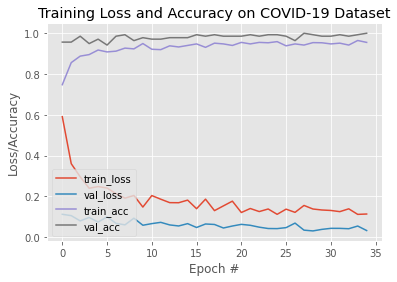

In [59]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = DenseNet121_model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))



  # compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [60]:
predict_imagePaths=[ '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(DenseNet121_model.predict(img).argmax(axis=1))
DenseNet121_model.predict(img)

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]


array([[0.9835796 , 0.01642047]], dtype=float32)

END OF DENSE121


INCEPTION RESNETV2

In [61]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

In [62]:
IMG_SHAPE = (224,224,3)

# Create the base model from the pre-trained model Xception
baseModel = InceptionResNetV2(include_top=False,weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


InceptionResNetV2_model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

219062272/219055592 [==============================] - 6s 0us/step


In [63]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 40
BS = 16
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
InceptionResNetV2_model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = InceptionResNetV2_model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/40
34/34 [==============================] - 19s 550ms/step - loss: 0.5190 - accuracy: 0.8093 - val_loss: 0.0613 - val_accuracy: 0.9855
Epoch 2/40
34/34 [==============================] - 13s 370ms/step - loss: 0.2646 - accuracy: 0.9084 - val_loss: 0.0741 - val_accuracy: 0.9928
Epoch 3/40
34/34 [==============================] - 13s 378ms/step - loss: 0.2093 - accuracy: 0.9121 - val_loss: 0.1477 - val_accuracy: 0.9203
Epoch 4/40
34/34 [==============================] - 13s 370ms/step - loss: 0.1950 - accuracy: 0.9234 - val_loss: 0.0558 - val_accuracy: 0.9855
Epoch 5/40
34/34 [==============================] - 12s 365ms/step - loss: 0.1807 - accuracy: 0.9364 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 6/40
34/34 [==============================] - 12s 367ms/step - loss: 0.1567 - accuracy: 0.9383 - val_loss: 0.0504 - val_accuracy: 0.9928
Epoch 7/40
34/34 [==============================] - 11s 317ms/step - loss: 0.1640 - accuracy

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.98      1.00      0.99        64
      normal       1.00      0.99      0.99        74

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

[[64  0]
 [ 1 73]]
acc: 0.9928
sensitivity: 1.0000
specificity: 0.9865


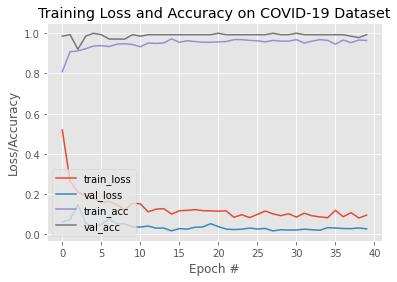

In [64]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = InceptionResNetV2_model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))



  # compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [65]:
predict_imagePaths=[ '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (32).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (42).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2 (180).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0339-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0019-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0323-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0370-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (79).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (28).jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (71).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train11.png',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (43).jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (30).jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0311-0001.jpeg','/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected/covid_train (21).png']
# loop over the image paths
for imagePath in predict_imagePaths:
	# extract the class label from the filename
#	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  img = np.array(image) / 255.0
  img=np.reshape(img,(1,224,224,3))
  print(DenseNet121_model.predict(img).argmax(axis=1))
InceptionResNetV2_model.predict(img)


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]


array([[0.9788848 , 0.02111522]], dtype=float32)

END OF INCEPTION RESNETV2